In [1]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline
from pylab import rcParams
from sklearn.metrics import  mean_squared_error

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

C:\Users\dell\AppData\Local\Temp/ipykernel_6944/2073564292.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
df_1 = pd.read_csv("SoftDrink.csv",parse_dates=True,squeeze=True,index_col=0)

In [3]:
df_1.head()

YearMonth
1980-01-01    1954
1980-02-01    2302
1980-03-01    3054
1980-04-01    2414
1980-05-01    2226
Name: SoftDrinkProduction, dtype: int64

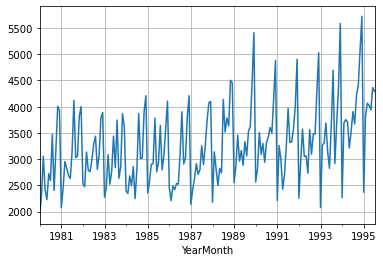

In [4]:
df_1.plot();
plt.grid()

# Method 2:

In [5]:
df_2 = pd.read_csv("SoftDrink.csv")

In [6]:
df_2.head()

,YearMonth,SoftDrinkProduction
0,1980-01,1954
1,1980-02,2302
2,1980-03,3054
3,1980-04,2414
4,1980-05,2226


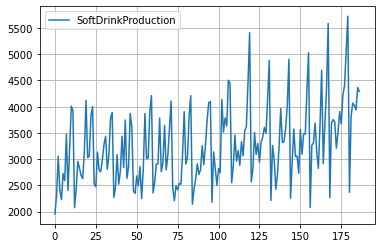

In [7]:
df_2.plot();
plt.grid()

In [8]:
date = pd.date_range(start='1/1/1980', end='7/1/1995', freq='M')

In [9]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-09-30', '1994-10-31', '1994-11-30', '1994-12-31',
               '1995-01-31', '1995-02-28', '1995-03-31', '1995-04-30',
               '1995-05-31', '1995-06-30'],
              dtype='datetime64[ns]', length=186, freq='M')

In [10]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_2.head()

,YearMonth,SoftDrinkProduction,Time_Stamp
0,1980-01,1954,1980-01-31
1,1980-02,2302,1980-02-29
2,1980-03,3054,1980-03-31
3,1980-04,2414,1980-04-30
4,1980-05,2226,1980-05-31


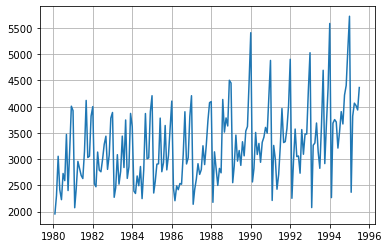

In [11]:
plt.plot(df_2['Time_Stamp'],df_2['SoftDrinkProduction']);
plt.grid()

# Find the mean and median of the Soft Drink Production.

In [12]:
df_1.describe()

count     187.000000
mean     3262.609626
std       728.357367
min      1954.000000
25%      2748.000000
50%      3134.000000
75%      3741.000000
max      5725.000000
Name: SoftDrinkProduction, dtype: float64

In [13]:
df_2.describe()

,SoftDrinkProduction
count,187.000000
mean,3262.609626
std,728.357367
min,1954.000000
25%,2748.000000
50%,3134.000000
75%,3741.000000
max,5725.000000


## Get all the observations for all months for the year 1980.

### The following is the code snippet to get all the particular observations from a particular year of interest.

In [14]:
df_1['1980']

YearMonth
1980-01-01    1954
1980-02-01    2302
1980-03-01    3054
1980-04-01    2414
1980-05-01    2226
1980-06-01    2725
1980-07-01    2589
1980-08-01    3470
1980-09-01    2400
1980-10-01    3180
1980-11-01    4009
1980-12-01    3924
Name: SoftDrinkProduction, dtype: int64

# Plot a year on year boxplot for the beer production

Now, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers in each year, if any

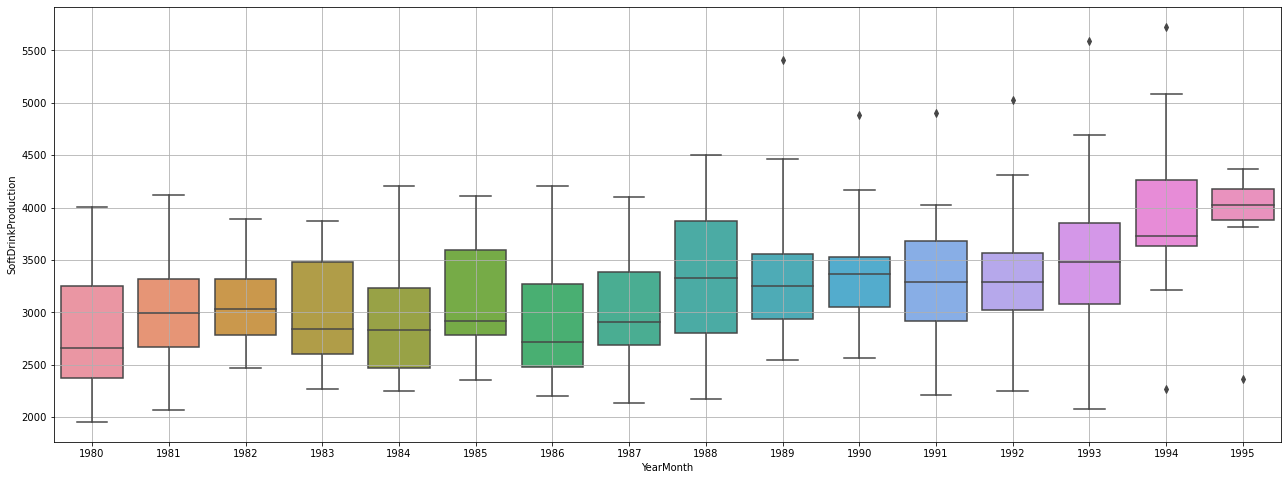

In [15]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1.index.year, df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('YearMonth');
plt.ylabel('SoftDrinkProduction');

#  Plot a monthly boxplot for the beer production taking all the years into account.¶

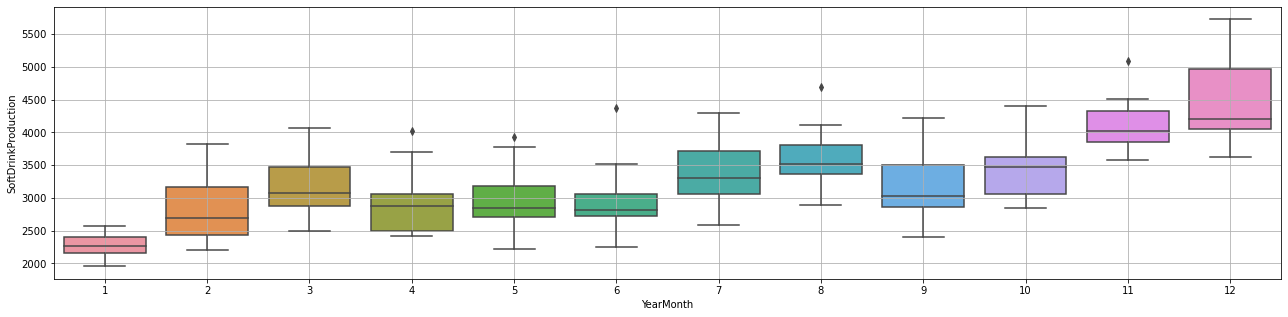

In [16]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df_1.index.month, df_1, ax=ax,whis=1.5)
plt.grid();

# Plot a monthplot of the give Time Series.

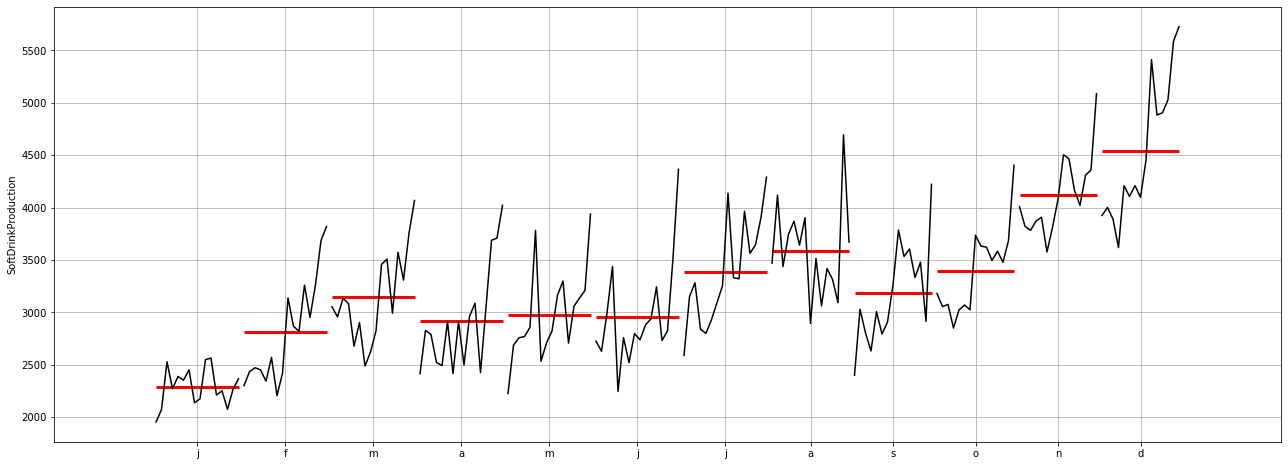

In [17]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_1,ylabel='SoftDrinkProduction',ax=ax)
plt.grid();

# Plot the Time Series according to different months for different years.

In [18]:
df_2.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df_2.head()

,YearMonth,SoftDrinkProduction
Time_Stamp,,
1980-01-31,1980-01,1954
1980-02-29,1980-02,2302
1980-03-31,1980-03,3054
1980-04-30,1980-04,2414
1980-05-31,1980-05,2226


In [19]:
df_2.drop(labels='YearMonth',inplace=True,axis=1)
df_2.head()

,SoftDrinkProduction
Time_Stamp,
1980-01-31,1954
1980-02-29,2302
1980-03-31,3054
1980-04-30,2414
1980-05-31,2226


In [20]:
df_2['SoftDrinkProduction']

Time_Stamp
1980-01-31    1954
1980-02-29    2302
1980-03-31    3054
1980-04-30    2414
1980-05-31    2226
              ... 
1995-03-31    4067
1995-04-30    4022
1995-05-31    3937
1995-06-30    4365
NaT           4290
Name: SoftDrinkProduction, Length: 187, dtype: int64

In [21]:
yearly_sales_across_months = pd.pivot_table(df_2, values = 'SoftDrinkProduction', columns = df_2.index.month, 
                                        index = df_2.index.year)

yearly_sales_across_months

Time_Stamp,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Time_Stamp,,,,,,,,,,,,
1980.0,1954.0,2302.0,3054.0,2414.0,2226.0,2725.0,2589.0,3470.0,2400.0,3180.0,4009.0,3924.0
1981.0,2072.0,2434.0,2956.0,2828.0,2687.0,2629.0,3150.0,4119.0,3030.0,3055.0,3821.0,4001.0
1982.0,2529.0,2472.0,3134.0,2789.0,2758.0,2993.0,3282.0,3437.0,2804.0,3076.0,3782.0,3889.0
1983.0,2271.0,2452.0,3084.0,2522.0,2769.0,3438.0,2839.0,3746.0,2632.0,2851.0,3871.0,3618.0
1984.0,2389.0,2344.0,2678.0,2492.0,2858.0,2246.0,2800.0,3869.0,3007.0,3023.0,3907.0,4209.0
1985.0,2353.0,2570.0,2903.0,2910.0,3782.0,2759.0,2931.0,3641.0,2794.0,3070.0,3576.0,4106.0
1986.0,2452.0,2206.0,2488.0,2416.0,2534.0,2521.0,3093.0,3903.0,2907.0,3025.0,3812.0,4209.0
1987.0,2138.0,2419.0,2622.0,2912.0,2708.0,2798.0,3254.0,2895.0,3263.0,3736.0,4077.0,4097.0
1988.0,2175.0,3138.0,2823.0,2498.0,2822.0,2738.0,4137.0,3515.0,3785.0,3632.0,4504.0,4451.0


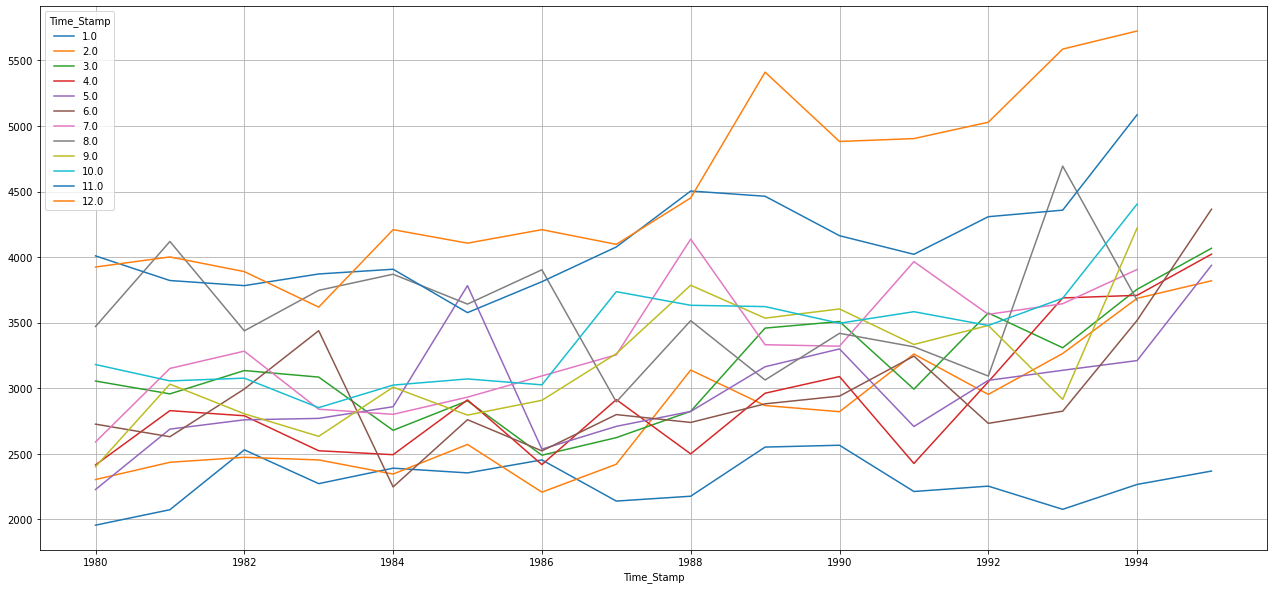

In [22]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

Read this monthly data into a quarterly and yearly format. Compare the Time Series plot and draw inferences.

# Yearly Plot

In [23]:
df_yearly_sum = df_1.resample('A').sum()
df_yearly_sum.head()

YearMonth
1980-12-31    34247
1981-12-31    36782
1982-12-31    36945
1983-12-31    36093
1984-12-31    35822
Freq: A-DEC, Name: SoftDrinkProduction, dtype: int64

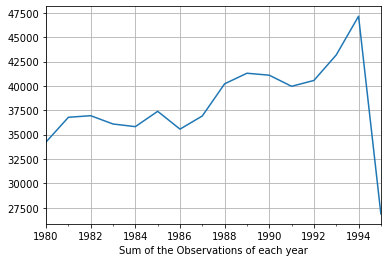

In [24]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [25]:
df_yearly_mean = df_1.resample('Y').mean()
df_yearly_mean.head()

YearMonth
1980-12-31    2853.916667
1981-12-31    3065.166667
1982-12-31    3078.750000
1983-12-31    3007.750000
1984-12-31    2985.166667
Freq: A-DEC, Name: SoftDrinkProduction, dtype: float64

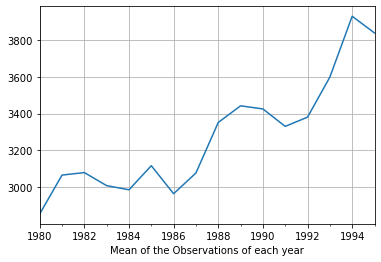

In [26]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');


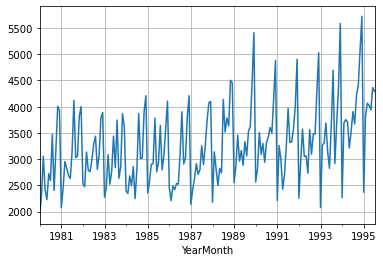

In [27]:
df_1.plot()
plt.grid();

# Quarterly Plot

In [28]:
df_quarterly_sum = df_1.resample('Q').sum()
df_quarterly_sum.head()

YearMonth
1980-03-31     7310
1980-06-30     7365
1980-09-30     8459
1980-12-31    11113
1981-03-31     7462
Freq: Q-DEC, Name: SoftDrinkProduction, dtype: int64

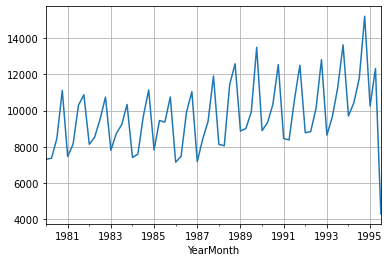

In [29]:
df_quarterly_sum.plot();
plt.grid()

In [30]:
df_quarterly_mean = df_1.resample('Q').mean()
df_quarterly_mean.head()

YearMonth
1980-03-31    2436.666667
1980-06-30    2455.000000
1980-09-30    2819.666667
1980-12-31    3704.333333
1981-03-31    2487.333333
Freq: Q-DEC, Name: SoftDrinkProduction, dtype: float64

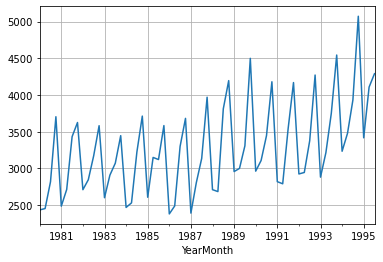

In [31]:
df_quarterly_mean.plot();
plt.grid()

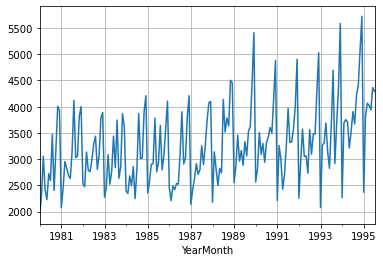

In [32]:
df_1.plot()
plt.grid();

### Daily Plot

In [33]:
df_daily_sum = df_1.resample('D').sum()
df_daily_sum

YearMonth
1980-01-01    1954
1980-01-02       0
1980-01-03       0
1980-01-04       0
1980-01-05       0
              ... 
1995-06-27       0
1995-06-28       0
1995-06-29       0
1995-06-30       0
1995-07-01    4290
Freq: D, Name: SoftDrinkProduction, Length: 5661, dtype: int64

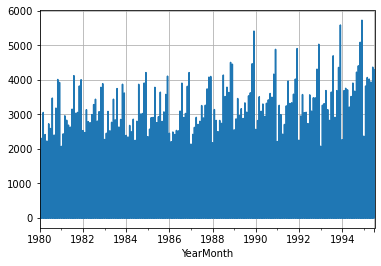

In [34]:
df_daily_sum.plot()
plt.grid();

### Decade Plot

In [35]:
df_decade_sum = df_1.resample('10Y').sum()
df_decade_sum

YearMonth
1980-12-31     34247
1990-12-31    378143
2000-12-31    197718
Freq: 10A-DEC, Name: SoftDrinkProduction, dtype: int64

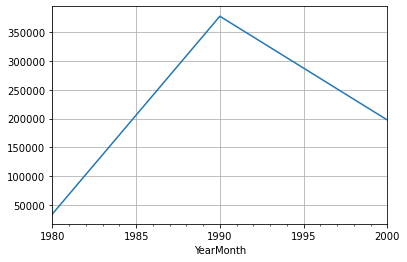

In [36]:
df_decade_sum.plot();
plt.grid()

# Decompose the Time Series

### Additive Model

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

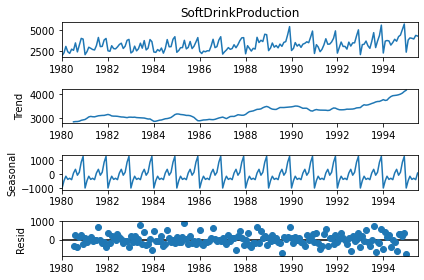

In [38]:
decomposition = seasonal_decompose(df_1,model='additive')
decomposition.plot();

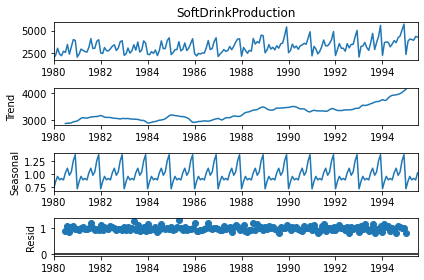

In [39]:
#Multipilicative
decompositionsm = seasonal_decompose(df_1,model='multiplicative')
decompositionsm.plot();

In [40]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [41]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2858.833333
1980-08-01    2869.250000
1980-09-01    2870.666667
1980-10-01    2883.833333
1980-11-01    2920.291667
1980-12-01    2935.500000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -974.619692
1980-02-01    -451.246677
1980-03-01    -143.118700
1980-04-01    -366.181200
1980-05-01    -286.815129
1980-06-01    -383.594891
1980-07-01      82.191419
1980-08-01     346.363641
1980-09-01     -69.997470
1980-10-01     136.721974
1980-11-01     850.369196
1980-12-01    1259.927530
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01   -352.024752
1980-08-01    254.386359
1980-09-01   -400.669196
1980-10-01    159.444692


In [42]:
trendsm = decompositionsm.trend
seasonalitysm = decompositionsm.seasonal
residualsm = decompositionsm.resid

print('Trendsprm','\n',trendsm.head(12),'\n')
print('Seasonalitysprm','\n',seasonalitysm.head(12),'\n')
print('Residualsprm','\n',residualsm.head(12),'\n')

Trendsprm 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2858.833333
1980-08-01    2869.250000
1980-09-01    2870.666667
1980-10-01    2883.833333
1980-11-01    2920.291667
1980-12-01    2935.500000
Name: trend, dtype: float64 

Seasonalitysprm 
 YearMonth
1980-01-01    0.709526
1980-02-01    0.856420
1980-03-01    0.953935
1980-04-01    0.885217
1980-05-01    0.913735
1980-06-01    0.883890
1980-07-01    1.023936
1980-08-01    1.114195
1980-09-01    0.975955
1980-10-01    1.040944
1980-11-01    1.261792
1980-12-01    1.380456
Name: seasonal, dtype: float64 

Residualsprm 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.884444
1980-08-01    1.085425
1980-09-01    0.856641
1980-10-01    1.059326
1980-11-01    1.087983
1980-12-01    0.96833

In [43]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2506.808581
1980-08-01    3123.636359
1980-09-01    2469.997470
1980-10-01    3043.278026
1980-11-01    3158.630804
1980-12-01    2664.072470
dtype: float64

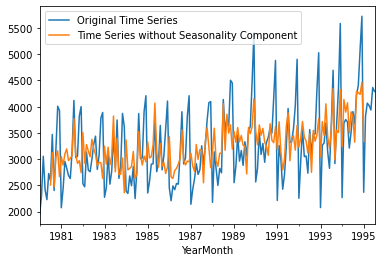

In [45]:
df_1.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

# Missing Value Handling

In [46]:
df_1['1985'].tail()

YearMonth
1985-08-01    3641
1985-09-01    2794
1985-10-01    3070
1985-11-01    3576
1985-12-01    4106
Name: SoftDrinkProduction, dtype: int64

In [47]:
df_missing_value = df_1.replace(to_replace=183.1,value=np.NaN)

In [48]:
df_missing_value.isna().sum()

0

# Split the data into train and test and plot the training and test data.

In [49]:
#Question 3
#Training and Testing dat

In [50]:
#Splitting the data 
train = df_2[df_2.index < '1991-01-01']
test = df_2[df_2.index >= '1991-01-01']

In [51]:
print('Shape of dataset_2:')
print("test dataset_2: ",test.shape,'\n')
print("train dataset_2: ",train.shape)
print('Rows of dataset_2: ')
print('First few rows of Training Data for SoftDrinkProduction','\n',train.head(),'\n')
print('Last few rows of Training Data for SoftDrinkProduction','\n',train.tail(),'\n')
print('First few rows of Test Data for SoftDrinkProduction','\n',test.head(),'\n')
print('Last few rows of Test Data SoftDrinkProduction','\n',test.tail(),'\n')

Shape of dataset_2:
test dataset_2:  (54, 1) 

train dataset_2:  (132, 1)
Rows of dataset_2: 
First few rows of Training Data for SoftDrinkProduction 
             SoftDrinkProduction
Time_Stamp                     
1980-01-31                 1954
1980-02-29                 2302
1980-03-31                 3054
1980-04-30                 2414
1980-05-31                 2226 

Last few rows of Training Data for SoftDrinkProduction 
             SoftDrinkProduction
Time_Stamp                     
1990-08-31                 3418
1990-09-30                 3604
1990-10-31                 3495
1990-11-30                 4163
1990-12-31                 4882 

First few rows of Test Data for SoftDrinkProduction 
             SoftDrinkProduction
Time_Stamp                     
1991-01-31                 2211
1991-02-28                 3260
1991-03-31                 2992
1991-04-30                 2425
1991-05-31                 2707 

Last few rows of Test Data SoftDrinkProduction 
           

In [52]:
#Question 4

#Model on Training data and RMSE on test data
#Model 1:Linear Regression
#Model 2: Naive Approach
#Model 3: Moving Average(MA)
#Model 4: Simple Average
#Model 5: Simple Exponential Smoothing
#Model 6: Double Exponential Smoothing (Holt's Model)
#Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [53]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]

print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]


In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [56]:
lr = LinearRegression()

In [57]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['SoftDrinkProduction'].values)

LinearRegression()

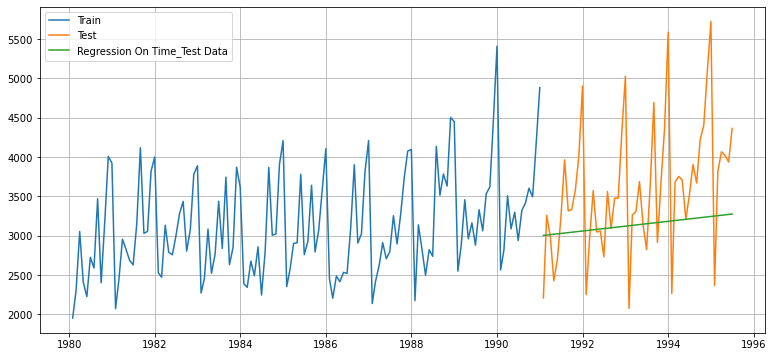

In [58]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [59]:
from sklearn import metrics

In [61]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['SoftDrinkProduction'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 895.992


In [62]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,895.991843


# Naive Approach

In [63]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [65]:
NaiveModel_test['naive'] = np.asarray(train['SoftDrinkProduction'])[len(np.asarray(train['SoftDrinkProduction']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    4882
1991-02-28    4882
1991-03-31    4882
1991-04-30    4882
1991-05-31    4882
Name: naive, dtype: int64

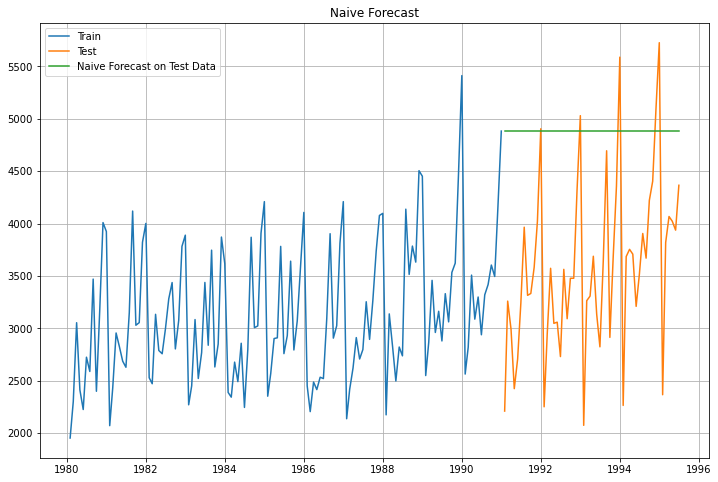

In [67]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [68]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['SoftDrinkProduction'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1531.144


In [69]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,895.991843
NaiveModel,1531.144029


# Simple Average

### For this particular simple average method, we will forecast by using the average of the training values.

In [70]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [71]:
SimpleAverage_test['mean_forecast'] = train['SoftDrinkProduction'].mean()
SimpleAverage_test.head()

,SoftDrinkProduction,mean_forecast
Time_Stamp,,
1991-01-31,2211,3124.166667
1991-02-28,3260,3124.166667
1991-03-31,2992,3124.166667
1991-04-30,2425,3124.166667
1991-05-31,2707,3124.166667


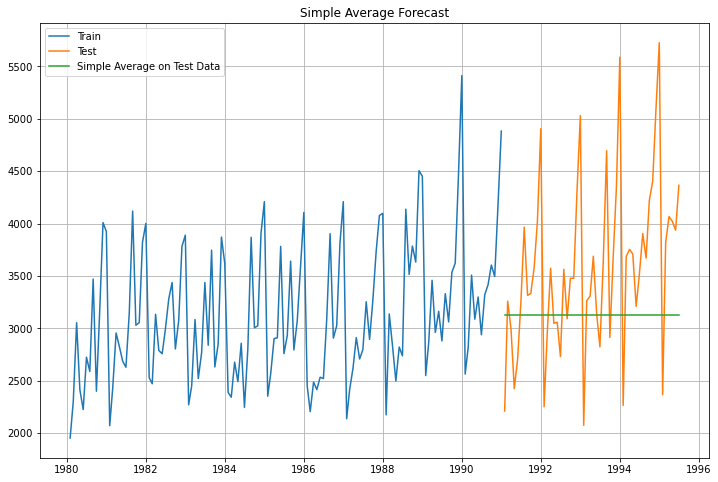

In [72]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(SimpleAverage_test['SoftDrinkProduction'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

# Model Evaluation

In [73]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['SoftDrinkProduction'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 929.523


In [74]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,895.991843
NaiveModel,1531.144029
SimpleAverageModel,929.523210


# Moving Average

# For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
## For Moving Average, we are going to average over the entire 

In [75]:
MovingAverage = df_2.copy()
MovingAverage.head()

,SoftDrinkProduction
Time_Stamp,
1980-01-31,1954
1980-02-29,2302
1980-03-31,3054
1980-04-30,2414
1980-05-31,2226


In [76]:
MovingAverage = df_2.copy()
MovingAverage.tail()

,SoftDrinkProduction
Time_Stamp,
1995-03-31,4067
1995-04-30,4022
1995-05-31,3937
1995-06-30,4365
NaT,4290


# Trailing moving averages

In [77]:
MovingAverage['Trailing_2'] = MovingAverage['SoftDrinkProduction'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['SoftDrinkProduction'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['SoftDrinkProduction'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['SoftDrinkProduction'].rolling(9).mean()

MovingAverage.head()

,SoftDrinkProduction,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1954,NaN,NaN,NaN,NaN
1980-02-29,2302,2128.0,NaN,NaN,NaN
1980-03-31,3054,2678.0,NaN,NaN,NaN
1980-04-30,2414,2734.0,2431.0,NaN,NaN
1980-05-31,2226,2320.0,2499.0,NaN,NaN


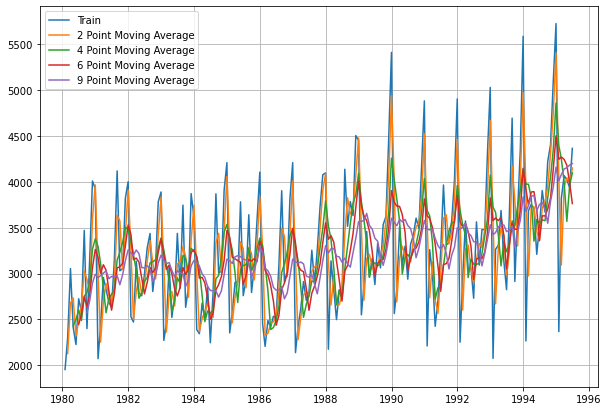

In [78]:
#Entire data plotting

plt.figure(figsize=(10,7))
plt.plot(MovingAverage['SoftDrinkProduction'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [79]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991-01-01']
print(trailing_MovingAverage_test.shape)
print(trailing_MovingAverage_train.shape)

(54, 5)
(132, 5)


In [80]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

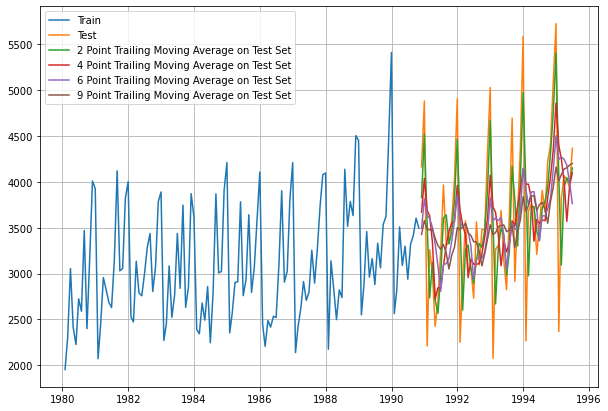

In [85]:
#Training and test dataset plot

plt.figure(figsize=(10,7))
plt.plot(trailing_MovingAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(trailing_MovingAverage_test['SoftDrinkProduction'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();